# Earthquakes in Italy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

eqdata = pd.read_csv('italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

**Exploring the data for earthquakes in Italy from late August through September**

In [2]:
eqdata.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [3]:
eqdata.index = pd.to_datetime(eqdata.index)

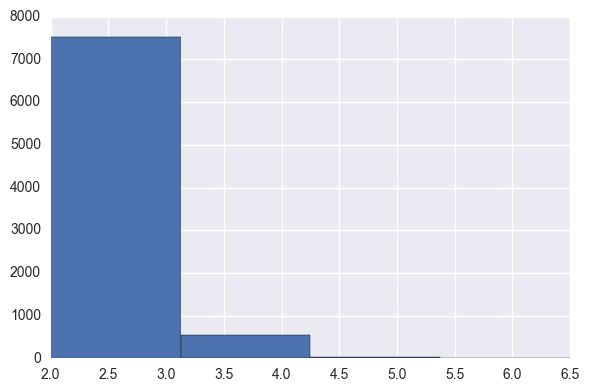

[ 2.     3.125  4.25   5.375  6.5  ]
[  7.52600000e+03   5.36000000e+02   1.90000000e+01   5.00000000e+00]


In [4]:
mag = eqdata.Magnitude
(n, bins, patches) = plt.hist(mag, bins = 4)
plt.tight_layout()
plt.show()
print(bins)
print(n)

**Most of these earthquakes were minor:**

 - Over 7000 earthquakes were between 2 and 3 in Magnitude
 - Over 500 were between a 3 and a 4
 - Only 19 earthquakes between a 4 and a 5
 - 5 earthquakes were greater than that

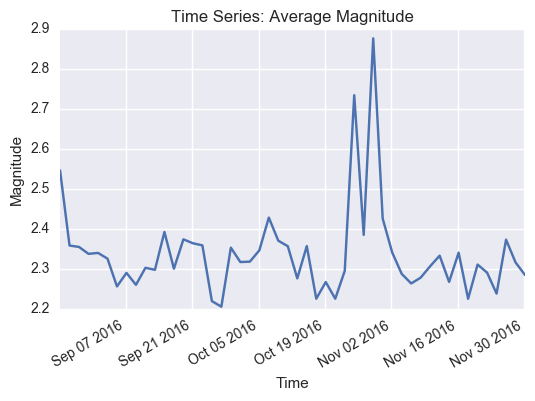

In [5]:
eqdata["Magnitude"].resample('2D').mean().plot()
plt.title("Time Series: Average Magnitude")
plt.ylabel("Magnitude")

**A good amount of earthquake activity occurred from mid October to mid November**

In [6]:
print('Highest Magnitude Earthquake:\n','Date/Time:', eqdata.Magnitude.idxmax(),'\n', 'Magnitude:', eqdata.Magnitude.max(),'\n Latitude/Longitude:',eqdata.Latitude[eqdata.Magnitude.idxmax()],',',eqdata.Longitude[eqdata.Magnitude.idxmax()])

Highest Magnitude Earthquake:
 Date/Time: 2016-10-30 08:40:17.360000 
 Magnitude: 6.5 
 Latitude/Longitude: 42.8322 , 13.1107


In [7]:
def drawmap(df, zoom=1):
    z= (10/3)-(1/3)*zoom
    m = Basemap(projection = 'merc',llcrnrlat=df.Latitude.min()-z, urcrnrlat=df.Latitude.max()+z, llcrnrlon=df.Longitude.min()-z, urcrnrlon=df.Longitude.max()+z)
    x,y = m(list(df.Longitude),list(df.Latitude))
    m.scatter(x,y, c = df.Magnitude, cmap = 'seismic')
    m.colorbar()
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    plt.show()
    plt.clf()

In [8]:
over4 = eqdata[eqdata.Magnitude >=4.25]

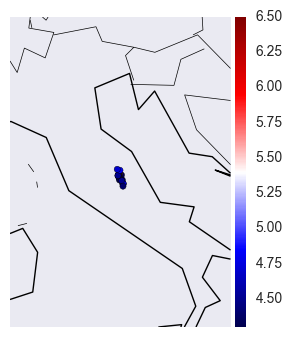

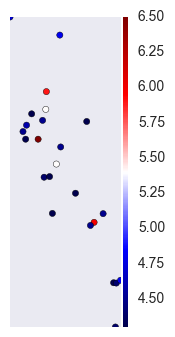

In [9]:
drawmap(over4, zoom = -3)
drawmap(over4, zoom = 10)

**As we can see all of the earthquakes occur toward the center of Italy.**

**To my understanding, this is actually  a very mountainous area, where there are some large fault lines, which make this area prone to earthquakes.**

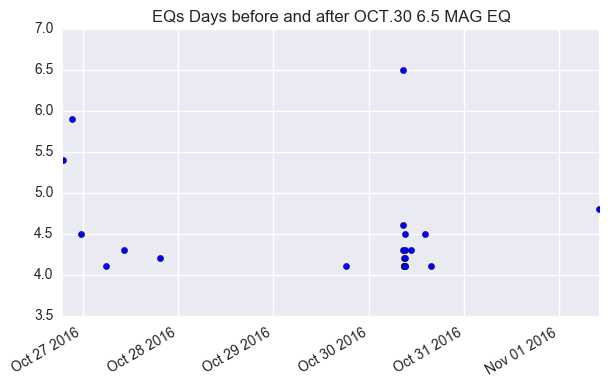

In [10]:
eqs1030 = eqdata[(eqdata.index >= '2016-10-26') & (eqdata.index <= '2016-11-03') & (eqdata.Magnitude >4)]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set(title = 'EQs Days before and after OCT.30 6.5 MAG EQ', xlim = [eqs1030.index.min(), eqs1030.index.max()])
ax.scatter(eqs1030.index,eqs1030.Magnitude)
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

**Lastly, I plotted the Earthquake activity above a 4.0 magnitude, 4 days before and after the large 6.5 magnitude earthquake. There were two large earthquakes(over 5 mag), just 4 days before the big one, which could have been foreshocks, foreshadowing the large 6.5 magnitude quake.**